# Plant Disease Prediction

Moumer Zaryab
Ansar Hayat

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [87]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import load_model 

## Data Preprocessing

### Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [25]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [33]:
cnn.add(tf.keras.layers.Flatten()) # it reshapes this multidimensional tensor into a one-dimensional vector by "flattening" all the dimensions 
# For example, if the output shape before the Flatten layer is (batch_size, 10, 10, 64), the Flatten layer will reshape it into (batch_size, 10*10*64).

In [34]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu')) 
# In the example you provided, the Dense layer with 1500 neurons acts as a bottleneck, reducing the dimensionality of 
#the features learned by the convolutional layers into a more compact representation. This can help in learning 
#higher-level representations of the data while reducing computational complexity.

In [35]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [36]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))
# Each of the 38 neurons in this layer will correspond to one of the 38 classes
# in the classification task, and the output of the model will be a vector of probabilities indicating 
#the likelihood of the input belonging to each class.

### Compiling and Training Phase

In [37]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
) 

#'categorical_crossentropy' is a common choice for multi-class classification problems where each example belongs to exactly one class. 
#It measures the difference 
#between the predicted probability distribution and the true probability distribution of the classes.

In [38]:
cnn.summary() #In the context of neural networks, "parameters" refer to the variables that the network learns from the training data. 
#These parameters include weights and biases associated with each neuron in the network. 
#Biases are additional parameters added to neurons that allow them to shift the activation function.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4158s 2s/step - accuracy: 0.3812 - loss: 2.1969 - val_accuracy: 0.8401 - val_loss: 0.5014
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4053s 2s/step - accuracy: 0.8337 - loss: 0.5264 - val_accuracy: 0.8872 - val_loss: 0.3527
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3774s 2s/step - accuracy: 0.9014 - loss: 0.3037 - val_accuracy: 0.9224 - val_loss: 0.2404
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4255s 2s/step - accuracy: 0.9319 - loss: 0.2068 - val_accuracy: 0.9435 - val_loss: 0.1814
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4676s 2s/step - accuracy: 0.9513 - loss: 0.1522 - val_accuracy: 0.9556 - val_loss: 0.1370
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4422s 2s/step - accuracy: 0.9623 - loss: 0.1123 - val_accuracy: 0.9530 - val_loss: 0.1454
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4512s 2s/step - accuracy: 0.9692 - loss: 0.0928 - val_accuracy: 0.9550 - val_loss: 0.1481
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4485s 2s/step - accuracy: 0.9755 -

## Evaluating Model

In [49]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 854s 389ms/step - accuracy: 0.9774 - loss: 0.0713
Training accuracy: 0.9781208038330078


In [41]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 209s 380ms/step - accuracy: 0.9524 - loss: 0.1666
Validation accuracy: 0.9517983198165894


### Saving Model

In [82]:
cnn.save('trained_plant_disease_model.keras') 

In [83]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5886905193328857,
  0.8566896915435791,
  0.9098228812217712,
  0.938174843788147,
  0.9552173018455505,
  0.963923454284668,
  0.9711074829101562,
  0.9768262505531311,
  0.979358434677124,
  0.9817625880241394],
 'loss': [1.3995224237442017,
  0.4527662396430969,
  0.2753026485443115,
  0.18795748054981232,
  0.13867340981960297,
  0.10933371633291245,
  0.08775275945663452,
  0.07148365676403046,
  0.06339450925588608,
  0.056402988731861115],
 'val_accuracy': [0.8400865197181702,
  0.8872069120407104,
  0.9223765134811401,
  0.943489670753479,
  0.9556112289428711,
  0.9529933929443359,
  0.9550421237945557,
  0.9622695446014404,
  0.9606760740280151,
  0.9517983198165894],
 'val_loss': [0.5013737082481384,
  0.35273993015289307,
  0.24040454626083374,
  0.18138064444065094,
  0.13695889711380005,
  0.14538253843784332,
  0.14806102216243744,
  0.11966079473495483,
  0.13714903593063354,
  0.17218706011772156]}

In [84]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [85]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

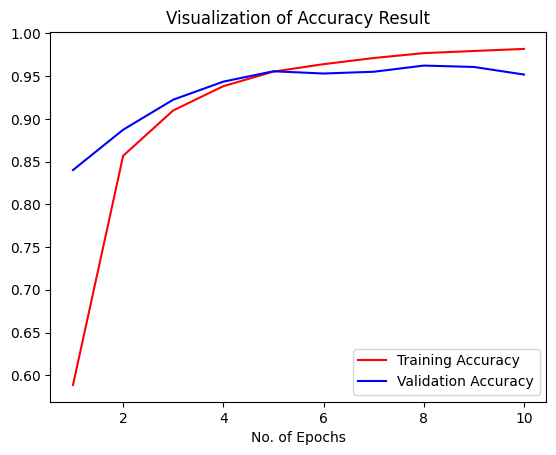

In [88]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [54]:
class_name = validation_set.class_names

In [55]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [56]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 359s 20ms/step


In [59]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2024-06-02 04:46:08.225971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [60]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [61]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [63]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [65]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.91      0.94       504
                                 Apple___Black_rot       0.98      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.95      0.93      0.94       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.86      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

### Confusion Matrix Visualization

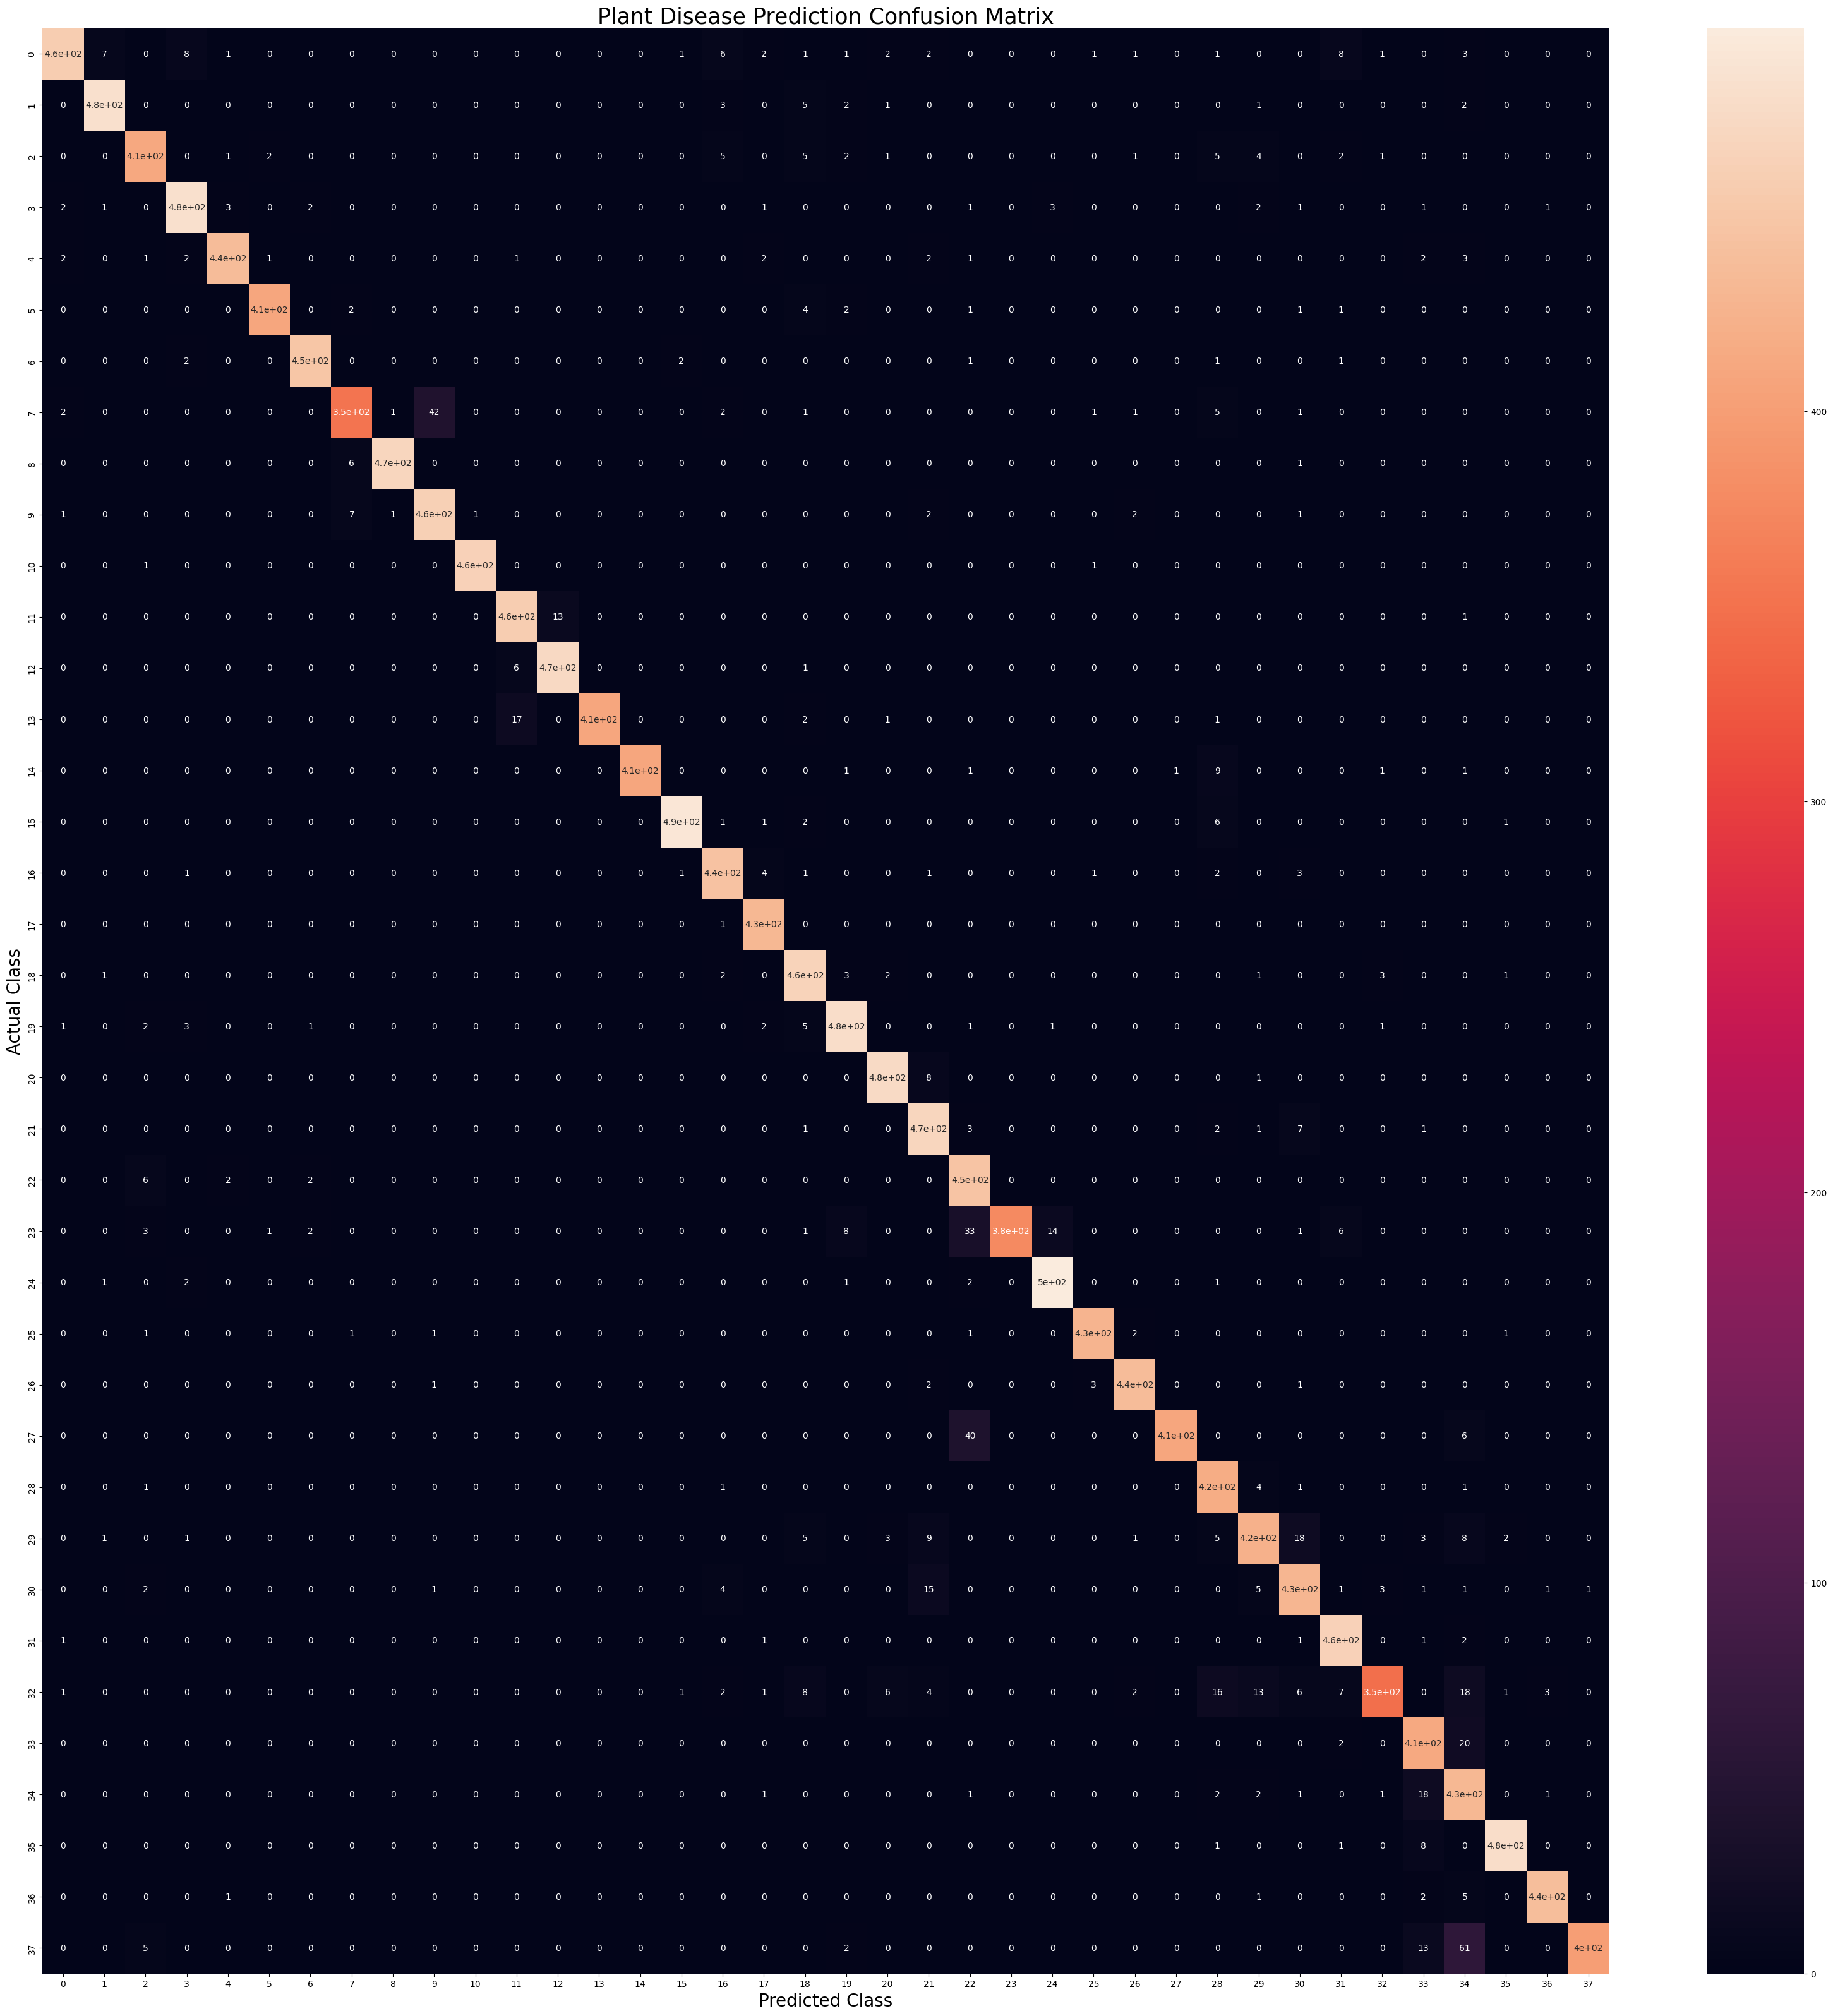

In [66]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [67]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
